In [84]:
import numpy as np

import pandas as pd
pd.options.display.precision = 2

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

データをロード。この例ではdata_field_codeという名前の列を記述子（ｘ）、valueという名前の列をｙとしてプロットします。

In [85]:
df = pd.read_csv('cdc_zika.csv')[10000:]
df = df[['data_field_code', 'value']]
df.dropna(axis=0, inplace=True)
df['value'] = df['value'].astype(int)
df.head()

,data_field_code,value
10000,CO0001,0
10001,CO0001,0
10002,CO0001,0
10003,CO0001,0
10004,CO0001,0


データ数などの確認。全部で97599行のデータがあります。

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97599 entries, 10000 to 107618
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   data_field_code  97599 non-null  object
 1   value            97599 non-null  int32 
dtypes: int32(1), object(1)
memory usage: 1.9+ MB


各列がいくつのユニークな値を持つかを確認しています。例えば、data_field_codeの項目は138個のユニークな値を持つため、これをOne Hotエンコードすると138列の記述子が作られます。これをそのままプロットすると大変見にくい図になってしまいます。私の場合は、ユニークな値の数が30以上あるものはプロットをあきらめています。

In [87]:
df.nunique()

data_field_code     138
value              1123
dtype: int64

ただ、それをプロットする方法もありますので、以下ではこれを可視化するいくつかの例を挙げます。

### とりあえずプロットしてみる

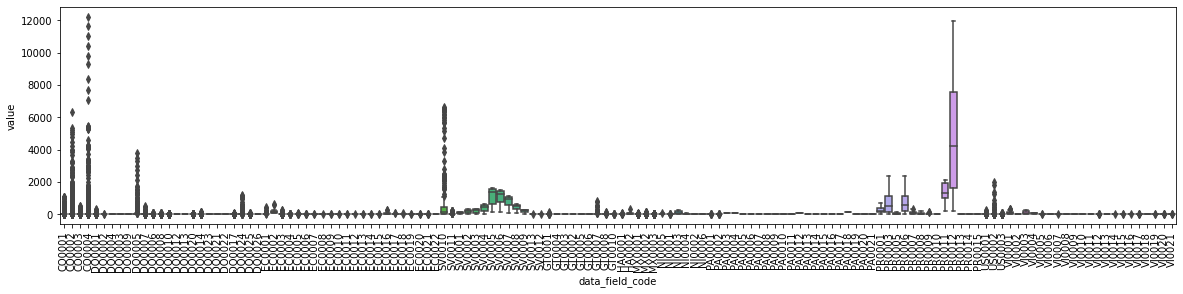

In [88]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(data=df, x='data_field_code', y='value')
plt.xticks(rotation=90)
plt.show()

### 平均値の上位20をプロット

とりあえず全てプロット

In [89]:
sorted_labels = df.groupby('data_field_code').mean().sort_values('value', ascending=False).index

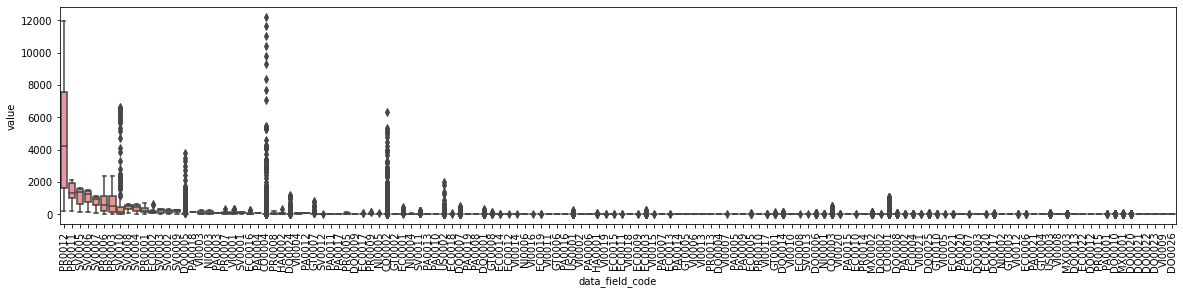

In [90]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(data=df, x='data_field_code', y='value', order=sorted_labels)
plt.xticks(rotation=90)
plt.show()

上位20を同様にプロット

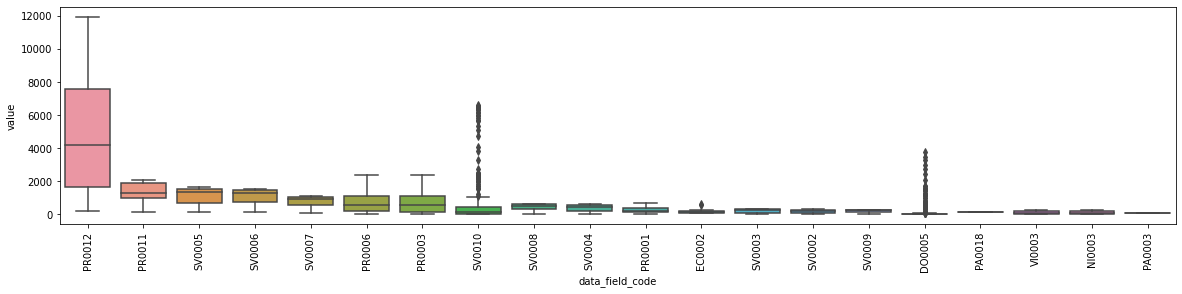

In [91]:
fig, ax = plt.subplots(figsize=(20, 4))
sns.boxplot(data=df, x='data_field_code', y='value', order=sorted_labels[:20])
plt.xticks(rotation=90)
plt.show()